# Creating a Key-Value Store
## Introduction
In this project, we will be using a B-tree data structure to implement a key-value store. It will work similarly to a Python dictionary, and it will be able to perform range queries. Our goal will be to create an easy-to-use, flexible, and adaptable key-value store that other developers could use in their projects.

## Importing BTree Class and Initializing Key Value Store

In [1]:
from btree import BTree

In [2]:
class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

## Overriding the Add Method
Here we want to override the `add()` method from our `BTree` class so that entries into our database cannot have the same key.

In [3]:
class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

## Testing the Implementation
Here we should test the implementation to make sure that adding values with the same keys do get replaced.

In [4]:
kv = KVStore()

# Test that the split_threshold is 2
assert kv.split_threshold == 2, "The split threshold is not equal to 2."

# Testing new add() method
for i in range(100):
    kv.add(i, i)

# Checking values
for i in range(100):
    assert kv.get_value(i) == i, "Incorrect value. The value of i should be i."

# Updating values
for i in range(100):
    kv.add(i, i + 1)

# Check the new values
for i in range(100):
    assert kv.get_value(i) == i + \
        1, "Incorrect value. The value of i should be i + 1."

## Implementing the Item Getter and Setter
Now we will implement a `__getitem__()` and `__setitem__()` method to enable users to use bracket syntax to add entries and retrieve values.

In [5]:
class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)

    def __setitem__(self, key, value):
        self.add(key, value)

## Testing Getter and Setter
Here we will run the same tests we did before, but this time we will use bracket syntax.

In [6]:
kv = KVStore()

# Test that the split_threshold is 2
assert kv.split_threshold == 2, "The split threshold is not equal to 2."

# Testing new add() method
for i in range(100):
    kv[i] = i

# Checking values
for i in range(100):
    assert kv[i] == i, "Incorrect value. The value of i should be i."

# Updating values
for i in range(100):
    kv[i] = i + 1

# Check the new values
for i in range(100):
    assert kv[i] == i + 1, "Incorrect value. The value of i should be i + 1."

## Enhancing the Contains Method
We want to implement a `__contains__()` method to enable the `in` operator, which will check if a given key is contained in the data structure.

In [7]:
class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)

    def __setitem__(self, key, value):
        self.add(key, value)

    def __contains__(self, key):
        return self.contains(key)

## Testing the In Operator

In [8]:
kv = KVStore()

for char in 'abcdefghijklmnopqrstuvwxyz':
    kv[char] = char

for char in 'abcdefghijklmnopqrstuvwxyz':
    assert char in kv, "Character is not in the key-value store."

## Range Queries
Here we will add new methods that will enable us to use range queries within our key-value store.

In [9]:
class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)

    def __setitem__(self, key, value):
        self.add(key, value)

    def __contains__(self, key):
        return self.contains(key)

    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if range_start > max_key or range_end < min_key:
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(
                    current_node) else max_key
                results += self._range_query(range_start,
                                             range_end, child, new_min_key, new_max_key)
        return results

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))

    def _range_intersects(self, range_start, range_end, node_min, node_max):
        if not node_min is None and node_min > range_end:
            return False
        if not node_max is None and node_max < range_start:
            return False
        return True

In [10]:
class DictKVStore(dict):

    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result

## Test Range Query
Here we will test the range of our key-value store against the dictionary range query.

In [11]:
dict_kv = DictKVStore()
our_kv = KVStore()
for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(1, 3), (4, 6), (1, 10), (5, 5)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures do not return the same range query result."

## Random Tests
Now we will test the whole implementation of our key-value store.

In [12]:
import random
random.seed(0)

dict_kv = DictKVStore()
kv = KVStore()

print("Testing Insertion")
for _ in range(1000):
    key = random.randint(0, 1000)
    value = random.randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value

print("Testing Length")
assert len(dict_kv) == len(
    kv), "Wrong length. Length should be {} but is {}.".format(len(dict_kv), len(kv))


print("Testing Values")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Wrong value for key {}. Expected value {} but found value {}.".format(
        key, dict_kv[key], kv[key])


print("Testing in Operator")
for i in range(1000):
    key = random.randint(0, 1000)
    assert (key in dict_kv) == (
        key in kv), "Contains method did not return the correct value for key {}.".format(key)


print("Testing Range Queries")
for _ in range(1000):
    range_start = random.randint(0, 1000)
    range_end = random.randint(range_start, 1000)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of result in range query [{}, {}]. Should be {} but was {}.".format(
        range_start, range_end, len(dict_results), len(kv_results))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "Wrong number of result in range query [{}, {}]. Should be {} but was {}.".format(
        range_start, range_end, len(dict_results), len(kv_results))

Testing Insertion
Testing Length
Testing Values
Testing in Operator
Testing Range Queries


## Performance Testing
Now we will compare the runtime of our range query in our key-store value to the range query of the dictionary. We will first load entries from a generated test dataset called `entries.csv`. Then we will loop over queries from a `queries.csv` file to measure the execution time between both data structures.

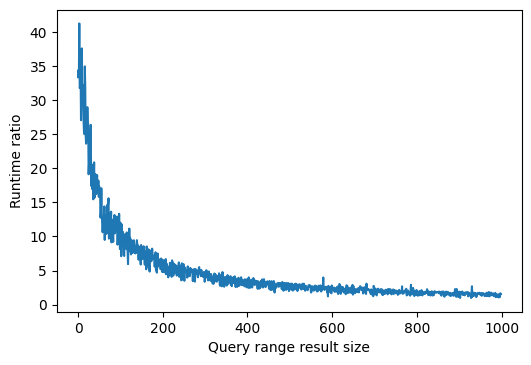

In [13]:
import matplotlib.pyplot as plt
import time
import csv

dict_kv = DictKVStore()
our_kv = KVStore()

# Load entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

# Measure query times
time_ratios = []  # List runtime ratios
with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])

        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start

        time_ratios.append(time_dict / time_kv)

# Plot results
%matplotlib inline

plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()

## Conclusion
For 50,000 entires, we get a performance boost of (at most) over 40 times. We can conclude that the range queries in our key-value store was at most over 40 times faster than using `DictKVStore`. However, this performance boost significantly decreases when the query range increases. This is a result of having to iterate more and more entries in the tree.